In [37]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [38]:
# read csv file
df = pd.read_csv(Path('Resources/crypto_data.csv'), index_col=0)
#len(df)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [39]:
# Remove currencies that are not being traded
df1=df[df.IsTrading != 0]
#len(df)
df1.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [40]:
# drop the `IsTrading` column
df1 = df1.drop(columns='IsTrading')
df1.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [41]:
# Find null values
for column in df.columns: 
    print(f"Column {column}: {df[column].isnull().sum()} null values.")

Column CoinName: 0 null values.
Column Algorithm: 0 null values.
Column IsTrading: 0 null values.
Column ProofType: 0 null values.
Column TotalCoinsMined: 508 null values.
Column TotalCoinSupply: 0 null values.


In [42]:
# Remove all rows that have at least one null value
df1 = df1[~(df1.isna() == True).any(axis=1)]

In [43]:
# Verify null values are gone
for column in df1.columns: 
    print(f"Column {column}: {df1[column].isnull().sum()} null values.")

Column CoinName: 0 null values.
Column Algorithm: 0 null values.
Column ProofType: 0 null values.
Column TotalCoinsMined: 0 null values.
Column TotalCoinSupply: 0 null values.


In [48]:
# Filter for coins that have been mined
df1 = df1[df1['TotalCoinsMined'] > 0]

# delete the `CoinName` from the original dataframe
cypto_name = pd.DataFrame(df.CoinName)

df2=df1.drop(columns='CoinName')

df1.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [49]:
cypto_name

,CoinName
42,42 Coin
365,365Coin
404,404Coin
611,SixEleven
808,808
...,...
XBC,BitcoinPlus
DVTC,DivotyCoin
GIOT,Giotto Coin
OPSC,OpenSourceCoin


In [50]:
# Convert Algorithm and ProofType to numeric values. 
df_w_dummies = pd.get_dummies(df2, columns=['Algorithm', 'ProofType'],drop_first=True, dtype=float)

In [51]:
df_w_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,1.055185e+09,532000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1337,2.927942e+10,314159265359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BTC,1.792718e+07,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ETH,1.076842e+08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GAP,1.493105e+07,250000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BDX,9.802226e+08,1400222610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZEN,7.296538e+06,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_w_dummies.describe()

,TotalCoinsMined,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
count,5.320000e+02,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,5.340456e+09,0.001880,0.001880,0.003759,0.005639,0.001880,0.003759,0.003759,0.001880,0.001880,...,0.330827,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880
std,4.564568e+10,0.043355,0.043355,0.061256,0.074952,0.043355,0.061256,0.061256,0.043355,0.043355,...,0.470954,0.043355,0.043355,0.043355,0.043355,0.043355,0.043355,0.043355,0.043355,0.043355
min,4.199995e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.359849e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.474397e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.867250e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.899887e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_w_dummies)

In [54]:
# create PCA preserve 90% 
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [55]:
pca.explained_variance_ratio_.cumsum()

array([0.02851314, 0.05034542, 0.07127549, 0.09214807, 0.11302064,
       0.13389321, 0.15474445, 0.1738488 , 0.1917776 , 0.20955138,
       0.22618076, 0.24247484, 0.25830978, 0.27295944, 0.28644505,
       0.29906841, 0.31138218, 0.32265506, 0.33359179, 0.34430111,
       0.35492683, 0.36553414, 0.37612773, 0.38669744, 0.39725306,
       0.40776356, 0.41826011, 0.42875569, 0.43925127, 0.44974685,
       0.46024067, 0.47072504, 0.48120218, 0.491678  , 0.50215128,
       0.51262243, 0.52309171, 0.53355582, 0.54401847, 0.55447464,
       0.56493062, 0.57538659, 0.58584185, 0.59629536, 0.60674518,
       0.61719323, 0.62763633, 0.63807376, 0.64851005, 0.65894633,
       0.66938261, 0.6798189 , 0.69025518, 0.70069147, 0.71112775,
       0.72156403, 0.73200032, 0.7424366 , 0.75287288, 0.76330917,
       0.77374545, 0.78418174, 0.79461802, 0.8050543 , 0.81549059,
       0.82592687, 0.83636315, 0.84679944, 0.85723572, 0.867672  ,
       0.87810829, 0.88854457, 0.89898086, 0.90941714])

In [56]:
print(pca_transformed_data.shape)

(532, 74)


In [57]:
# Create TSNE
tsne = TSNE(perplexity=50, learning_rate=100)    

x_tsne_features = tsne.fit_transform(pca_transformed_data)

x_tsne_features.shape

C:\Users\86bur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

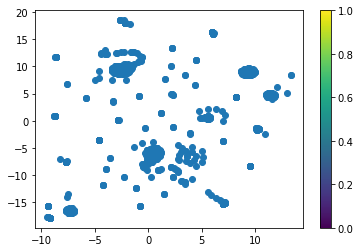

In [58]:
plt.scatter(x_tsne_features[:,0],x_tsne_features[:,1])
plt.colorbar()
plt.show()

C:\Users\86bur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


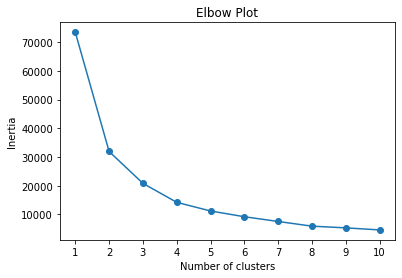

In [59]:
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x_tsne_features)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
x_tsne_elbow = pd.DataFrame(elbow_data)
x_tsne_elbow

plt.plot(x_tsne_elbow['k'], x_tsne_elbow['inertia'], marker = "o")
plt.xticks(range(1,11))
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [60]:
x_tsne_features = pd.DataFrame(x_tsne_features)

In [61]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [62]:
clusters = get_clusters(4, x_tsne_features)
clusters

,0,1,class
0,-3.403960,9.136541,1
1,-1.315215,12.615502,1
2,-1.718910,17.807119,1
3,-7.486891,-16.909248,3
4,9.510876,-8.250463,2
...,...,...,...
527,-7.626320,-14.051577,3
528,-1.903814,10.508590,1
529,7.191005,-15.032798,2
530,-7.669261,-7.595605,3


In [65]:
clusters = pd.DataFrame(clusters)
clusters = clusters.rename(columns = {0:'Column_A'})
clusters = clusters.rename(columns = {1:'Column_B'})

In [66]:
def show_clusters(df):
    plt.scatter(df["Column_A"], df["Column_B"], c=df['class'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

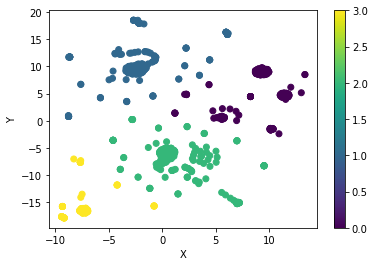

In [67]:
show_clusters(clusters)